In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [12]:
ticker ="^N225"
start_date="2010-01-01"
end_date="2020-03-31"
stock_data=yf.download(ticker,start=start_date,end=end_date)
print(stock_data)

[*********************100%***********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2010-01-04  10609.339844  10694.490234  10608.139648  10654.790039   
2010-01-05  10719.440430  10791.040039  10655.570312  10681.830078   
2010-01-06  10709.549805  10768.610352  10661.169922  10731.450195   
2010-01-07  10742.750000  10774.000000  10636.669922  10681.660156   
2010-01-08  10743.299805  10816.450195  10677.559570  10798.320312   
...                  ...           ...           ...           ...   
2020-03-24  17206.880859  18100.390625  17197.140625  18092.349609   
2020-03-25  18446.800781  19564.380859  18446.800781  19546.630859   
2020-03-26  19234.769531  19240.289062  18512.810547  18664.599609   
2020-03-27  19021.970703  19389.429688  18832.210938  19389.429688   
2020-03-30  18884.070312  19084.970703  18578.199219  19084.970703   

               Adj Close     Volume  
Date                                 
2010-01-04  1

In [13]:
data = stock_data['Close']

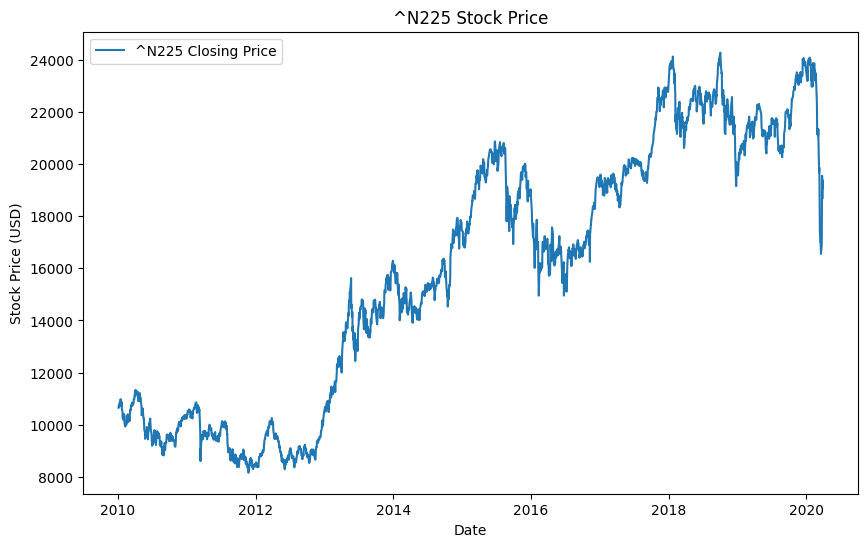

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(data, label=f"{ticker} Closing Price")
plt.title(f"{ticker} Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


In [15]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))

In [16]:
window_size = 60
X = []
y = []

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

In [17]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [18]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

c:\Users\h8551\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0612 - val_loss: 0.0029
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0024 - val_loss: 0.0064
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0021 - val_loss: 0.0017


In [20]:
last_60_days = data[-window_size:].values
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

In [21]:
X_test = np.reshape(last_60_days_scaled, (1, window_size, 1))
predicted_price_scaled = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price_scaled)
print(f"Predicted stock price for the next day: {predicted_price[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
Predicted stock price for the next day: 17808.205078125
